# Group Name: I Have Like 0 Idea

# Topic of Interest: Enzymes

# Notebook Overview 


1. Aim 
2. Introduction to Enzymes and Substrate
3. Enzyme-substrate Database 
4. Introduction to Michaelis-Menten Equation
5. Application (Lactate Dehydrogenase Experiment)
6. Limitations
7. Future works 
8. Summary 



# 1.Aim of Notebook:
1. Educate students on Enzyme and Subtrate 
2. Introduction of Michaelis-Menten equation 
3. Application of Michaelis-Menten on experimental data



## Set Up 
For awesomeness!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize, stats

# 2.Introduction to Enzymes and Substrates




## What are Enzymes? 

Enzymes are biological catalysts that speed up reactions within biological systems. They are important because they ensure that metabolic processes happen fast enough to sustain biological systems and life. Each enzyme has a unique active site.

## What are Substrates?

A substrate is a molecule upon which an enzyme acts to generate products. 

## What is an active site?
An active site is the region of an enzyme where substrate molecules bind and undergo a chemical reaction

## How do they work: Lock and Key Hypothesis

1. Enzymes are specialised proteins made up of long chains of amino acids known as polypeptides. The long polypeptide chain undergoes specific folding. They then form unique 3D structures held together via hydrogen bonds, ionic bonds, hydrophobic interactions and disulphide bonds. This specific conformation gives rise to a unique active site where only specific substrates can fit to form an enzyme-substrate complex.

2. The specfic action of the enzyme and substrate gives rise to the "Lock and Key" analogy. Here, the enzyme is the lock and the substrate is the key; where the specific substrate fits into a specific active site on the enzyme to form an enzyme-substrate complex, similiar to that of a key fitting a lock.


## A hand-drawn diagram to help visualise the concepts covered so far 
(Aren't they adorable? #AforEffort)

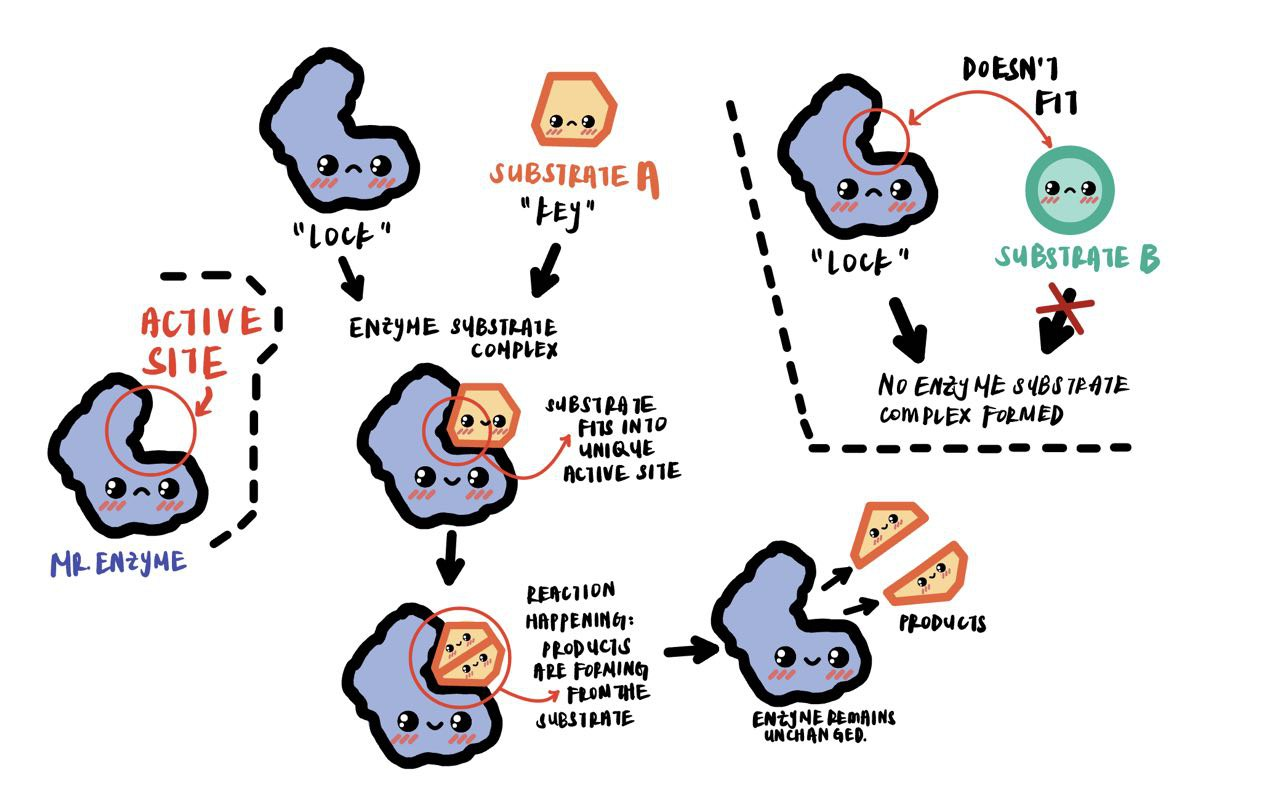

# 3.Enzyme-substrate database

The `Enzyme.csv` database contains a list of information:
1. Enzyme names
2. A short description
3. Substrate pair
4. $K_m$ value 
5. $V_{max}$ value
6. Citation 

The information in this database was manually compiled into an Excel spreadsheet.





Let's read the dataframe presented in the CSV file and see a short preview using `.head()`

In [2]:
df = pd.read_csv('Enzyme.csv')
df.head()

,Enzyme,Description,Substrate,Km(mM),Vmax (μmol/min),Citations
0,Hexokinase,Enzyme that phosphorylates hexoses (six-carbon...,Glucose,0.06,0.016,"RIKMENSPOEL, R., &amp; CAPUTO, R. (1966). The ..."
1,Hexokinase,Enzyme that phosphorylates hexoses (six-carbon...,Fructose,1.04,0.029,"RIKMENSPOEL, R., &amp; CAPUTO, R. (1966). The ..."
2,Beta-Galactosidase,Enzyme that cleaves the disaccharide lactose t...,Lactose,23.28,10.880,"Selvarajan, E., & Mohanasrinivasan, V. (2015)...."
3,Glutamate dehydrogenase,Enzyme that catalyzes the reversible conversio...,Glutamate,0.10,1.080,"Kwon, H. Y., Kang, J. H., Kwon, O. S., Cho, S...."
4,Glutamate dehydrogenase,Enzyme that catalyzes the reversible conversio...,NH4+,1.10,4.130,"Wang, L., Lai, L., Ouyang, Q., &amp; Tang, C. ..."


Let’s have a look at how different enzymes and substrates can pair up together.
The code below run through the various rows in the dataframe and prints out the enzyme and its complementary substrate pairing. Some f-string formating was used as well to make the output neater.

In [3]:
#Runs a list of possible enzyme-subtrate pairs and Km Values from the database

# f"\033[1m.....\033[0m bolds the string
# > aligns to the right, ^ aligns to center (f string formating)

print(f"\033[1m{'Enzyme' : >15}{'Substrate' : ^50}\033[0m")
for index, row in df.iterrows():
  value = index+1
  enzyme = row['Enzyme']
  substrate = row['Substrate']
  print(f'{value:<2} : {enzyme:<30}{substrate: <30}')

         Enzyme                    Substrate                     
1  : Hexokinase                    Glucose                       
2  : Hexokinase                    Fructose                      
3  : Beta-Galactosidase            Lactose                       
4  : Glutamate dehydrogenase       Glutamate                     
5  : Glutamate dehydrogenase       NH4+                          
6  : Glutamate dehydrogenase       NAD+                          
7  : Glutamate dehydrogenase       Alpha-Ketogluterate           
8  : Carbonic anhydrase            CO2                           
9  : Aspartate aminotransferase    Aspartate                     
10 : Aspartate aminotransferase    Alpha-Ketogluterate           
11 : Aspartate aminotransferase    Oxaloacetate                  
12 : Aspartate aminotransferase    Glutamate                     
13 : Threonine deaminase           Threonine                     
14 : Pyruvate carboxylase          Pyruvate                      
15 : Pyruv

## What enzyme/substrate is this for?
### Purpose: 
To quickly find the relevant enzyme or substrate pairing.The code above gives us a comprehensive overview of the enzyme-substrate pairing. However, it can be difficult to find and read the one of interest. Hence we formulated a function to quickly check and return the relevant information based on an unknown input.
### Importance: 
Each enzyme is unique and can only interact with certain substrates. With knowledge of an enzyme or substrate, one can easily find its relevant pairing.
### Code: 
The code below defines a function that runs through the enzyme dataframe and prints the corresponding enzyme/substrate based on the unknown input.
We can check if the dataframe contains the relevant information using `str.contains()`. The `case = False` allows you to search what you want without worrying about capitilzation! #wethinkaboutyoutoo!



In [4]:
def what_is_this_enzyme_or_substrate(unknown, df=df):
  enzyme_result = df.loc[df['Enzyme'].str.contains(unknown, case = False)]
  substrate_result = df.loc[df['Substrate'].str.contains(unknown, case = False)]
  final_result = enzyme_result.append(substrate_result)
  return final_result 

## Testing the function with an enzyme

In [5]:
what_is_this_enzyme_or_substrate('hExOkiNasE')

,Enzyme,Description,Substrate,Km(mM),Vmax (μmol/min),Citations
0,Hexokinase,Enzyme that phosphorylates hexoses (six-carbon...,Glucose,0.06,0.016,"RIKMENSPOEL, R., &amp; CAPUTO, R. (1966). The ..."
1,Hexokinase,Enzyme that phosphorylates hexoses (six-carbon...,Fructose,1.04,0.029,"RIKMENSPOEL, R., &amp; CAPUTO, R. (1966). The ..."


## Testing the function with a substrate

In [6]:
what_is_this_enzyme_or_substrate('LaCtoSE')

,Enzyme,Description,Substrate,Km(mM),Vmax (μmol/min),Citations
2,Beta-Galactosidase,Enzyme that cleaves the disaccharide lactose t...,Lactose,23.28,10.88,"Selvarajan, E., & Mohanasrinivasan, V. (2015)...."


# 4.Introduction to Michaelis-Menten Equation

## Some context first:
Activation energy exists for every biochemical reaction: the starting energy required for the reaction to happen. Enzymes help speed up reactions by catalysing the reaction. This is done by providing a reaction pathway with a lower activation energy. This lowered energy pathway increases the rate of reaction since more substrate molecules are able to overcome the lowered activation energy. Hence, more product molecules are formed.

Usually in the absence of enzymes, most biochemical reaction are unable to take place due to the naturally high activation energy.

### The energy diagram below showcases the effect of enzyme on the activation energy. 
Notice how the enzyme-catalysed reaction has a much lower activation energy. 

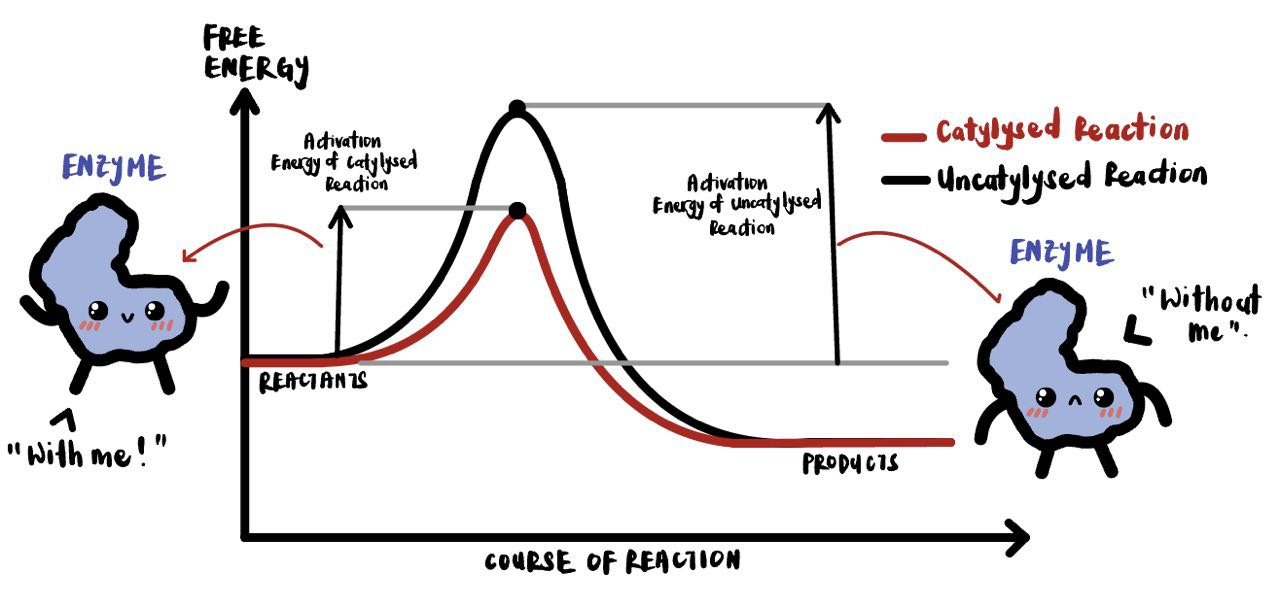

## The Significance of Reaction Velocity 

At this point, it is evident that the presence of enzymes affects the rate at which the reaction proceeds. 

This naturally leads us to examine the initial reaction rate of the reaction that is given by the concentration of a reactant consumed in a unit of time. From a reaction rate graph (shown on the left), we know the effectiveness of an enzyme's catalytic ability; the higher the reaction rate, the more effective the enzyme. 

It is therefore apparent that we are concerned with the **effectiveness of an enzyme**.

It informs us about:

1.   The rate of reaction. A high reaction velocity suggests a high rate of reaction. High amount of products is being produced.
2.   The amount of time needed for a reaction given a known enzyme-substrate pair, and hence optimize on efficient enzyme usage.

To further analyse enzyme effectiveness, we have decided to focus on the Michaelis-Menten Equation. 

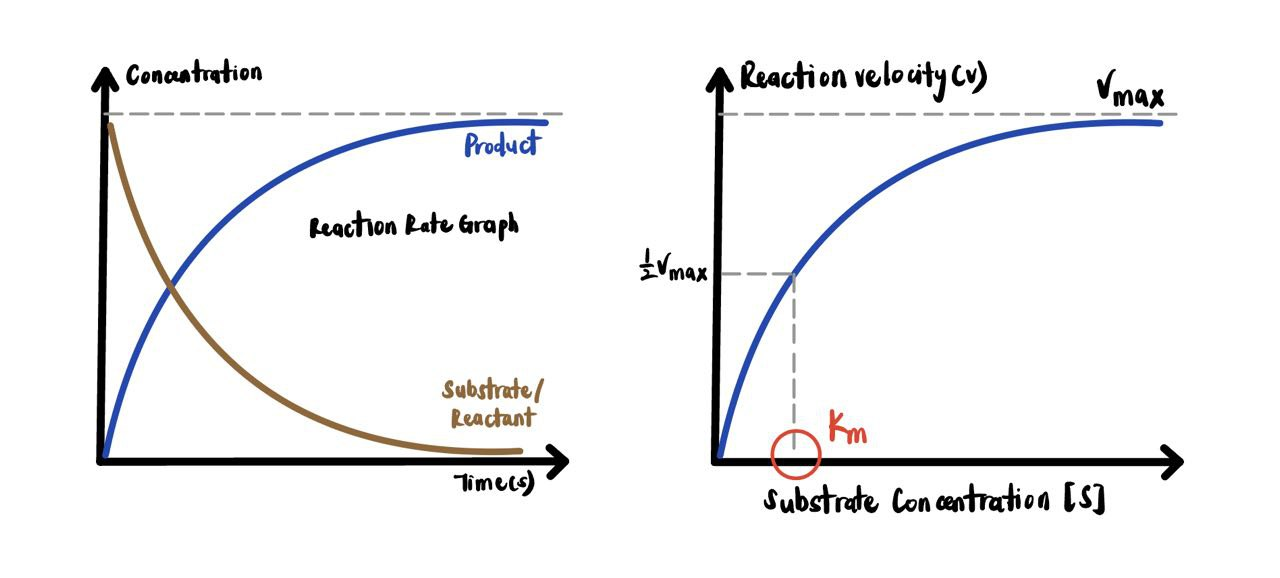

## Why did we choose the Michaelis-Menten Equation: 

The Michaelis-Menten Equation allows us to generate its corresponding graph - that relates the velocity of the reaction with the concentration of the substrate. 

# ${v_0}=\frac{V_{max}[S]}{K_m + [S]}$

1. $v_0$ = Initial velocity of reaction
2. $V_{max}$ = Maximum rate achieved by the system
3. $[S]$ = Concentration of substrate 
4. $K_m$ = Michaelis constant





## Significance of $K_m$: 

$K_m$ signifies **catalytic efficiency**: how efficiently an enzyme converts a substrate into product

What does the $K_m$ value tell us? 
1. The $K_m$ value of an enzyme is inversely proportional to binding affinity of its substrate. A high $K_m$ value signifies low binding affinity wherease a lower $K_m$ value signifies high binding affinity.   
2. The $K_m$ value can also be used to predict the $V_{max}$ on a Michaelis-Menten plot. The $K_m$ value meets the Michaelis-Menten curve at half $V_{max}$ value.
(More on this later)

Based on what we have learned so far, let us try creating a function that emulates the Michaelis-Menten equation.

In [7]:
# Define Michaelis-Menten equation 

def M_M (substrate, Km, Vmax):
    V0 = (Vmax * substrate) / (Km + substrate)
    return V0

Finally, we can have a look at what the Michaelis-Menten graph looks like.

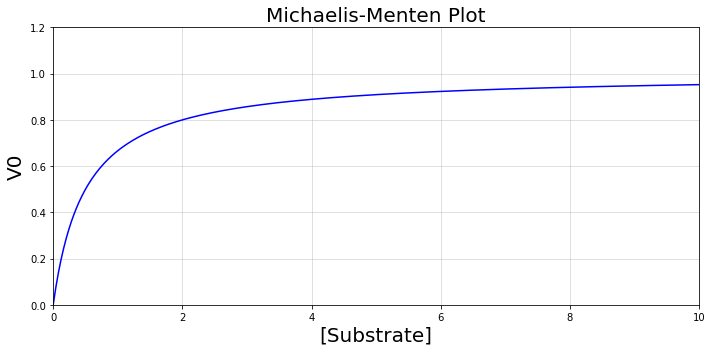

In [8]:
# Generate some values for [Substrate]
substrate = np.linspace(0, 10,num = 500, endpoint=True)

# Set Arbitrary Vmax and Km parameters 
Km = 0.5
Vmax = 1

# Plot the equation
plt.figure(figsize=(10, 5))

plt.plot(substrate,M_M(substrate, Km , Vmax), 
         color = 'blue')

plt.axis(xmin = 0, xmax = 10, ymin = 0, ymax = 1.2)
plt.title('Michaelis-Menten Plot', size = 20)
plt.xlabel('[Substrate]', size = 20)
plt.ylabel('V0', size = 20)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

By looking at the graph, we can observe a few things.
1. When [Substrate] is 0, initial velocity ($v_0$) is 0. Since there is no substrate, no reaction should occur.

2. As [Substrate] increases, initial velocity ($v_0$) increases. More substrate present results in more enzyme-substrate complex forming. Hence, higher reaction velocity.

3. As [Substrate] continues to increase, initial velocity ($v_0$) remain unaffected. Substrate is now present in excess. All available active sites on enzymes are used. All enzymes in reaction are now fully saturated.  


## Analysis of Michaelis-Menten Plot 
1. Notice the plateau of the graph? We can see that the graph tends to the value 1.00, which is the value of $V_{max}$ we set earlier.
2. Notice how the half $V_{max}$ line and the $K_m$ line meet at exactly the same point on the curve.

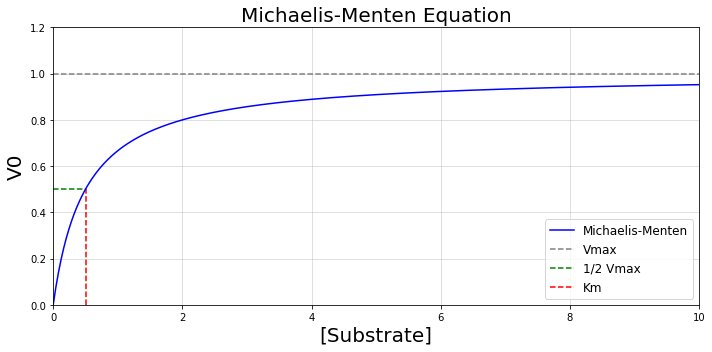

In [9]:
# Set Vmax and Km parameters 
Km = 0.5
Vmax = 1

# Plotting
plt.figure(figsize = (10,5))
plt.axis(xmin = 0, xmax = 10, ymin = 0, ymax = 1.2)
plt.plot(substrate,M_M(substrate, Km, Vmax), 
         label ='Michaelis-Menten', color = 'blue')

# Plot the Vmax line 
plt.hlines(y= Vmax, xmin = 0, xmax = 10,
           color ='gray', linestyle ='dashed', label ='Vmax')

# Plot the half Vmax and Km lines 
plt.hlines(y = Vmax/2, xmin = 0, xmax = Km,
           color ='green', linestyle ='dashed', label ='1/2 Vmax')

plt.vlines(x= Km, ymin = 0, ymax = Vmax/2, label ='Km',
           color='red', linestyle='dashed')

plt.legend(fontsize=12,loc = 'lower right')
plt.title('Michaelis-Menten Equation', size = 20)
plt.xlabel('[Substrate]', size = 20)
plt.ylabel('V0', size = 20)
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

## Using Math to support observations

### Original euqation:
# ${v_0}=\frac{V_{max}[S]}{K_m + [S]}$





### Showing ${V_{max}} $ at High $[S]$
When substrate concentration, $[S]$, increases indefinitely:
The denominator ${K_m + [S]}$ tend towards $[S]$, since $[S]$ >> ${K_m}$ and renders the value of ${K_m}$ to be insignificant.

The original equation then simplifies to: 

$ {v_0}≈\frac{V_{max}[S]}{[S]} $

$ {v_0}≈{V_{max}} $



### Showing ${K_m} $ at half ${V_{max}} $
As was discussed earlier in this section, when the velocity of the reaction is half that of the maximum velocity, $V_{max}$, the amount of substrate is $K_m$. This can be deduced with some simple math:

Let $v_0$ be $1/2$ of $V_{max}$. 

$ \frac{V_{max}}{2} = \frac{V_{max}[S]}{K_m + [S]} $ 

$ \frac{1}{2} = \frac{[S]}{K_m + [S]} $ 

$ K_m + [S] = 2[S] $ 

$ [S] = K_m $

## All that work for $V_{max}$? What even is $V_{max}$?

**Definition:** $V_{max}$ is the reaction rate when the enzyme is fully saturated by high [substrate].

In layman terms, the enzyme is working at **Maximum Capacity**. Increase in [substrate] will have **No Effect** on the reaction rate.


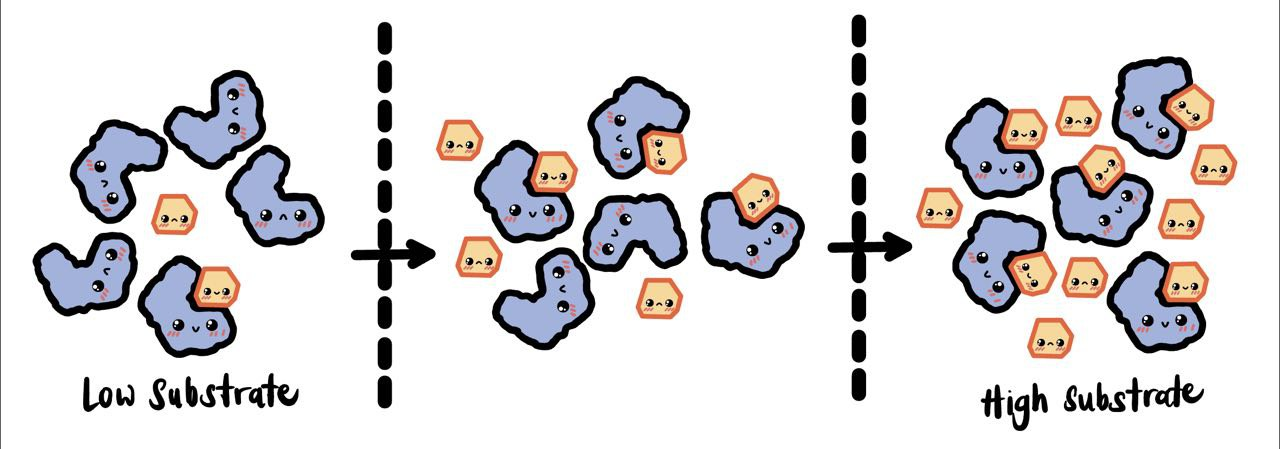

### Why should we predict $V_{max}$?
- $V_{max}$ is the **Highest Limit** of enzyme efficency.
- We should aim for **Maximum Efficiency** in all enzymatic reactions to **save time and money**, especially in large scale production.

### How can we predict $V_{max}$?
1. The first method is to use the $K_m$ value, since it meets the Michaelis-Menten Curve at half $V_{max}$ value. Using that information, we can predict the $V_{max}$ value for that enzyme-substrate pair.

2. The second method is experiment-based. We can use different [substrate] with the same enzyme and measure its initial reaction velocity, $v_0$. After collecting the data set, we can plot a best fit curve and estimate the plateau. (The plateau of the curve is the $V_{max}$ value since any further increase in [sustrate] does not affect $v_0$.)

# 5.Time for some **Real World** application! (and fun)
Lactate dehydrogenase, (also known as LDH) is an enzyme found in almost all body tissues. It plays an important role in cellular respiration, the process by which glucose (sugar) from food is converted into usable energy for our cells.


## Experiment Brief 
1. Varying concentrations of Lactate is added to a constant concentration of LDH enzyme. A stopwatch measures the total time taken for all available Lactate to be broken down into its product, Pyruvate. 

2. 5 different concentrations of Lactate was used. Here are some experimental data on Lactate (Substrate) and LDH (Enzyme).

This `Experimental_data.csv` file contains experimental data taken from NUS Life Science Module "LSM2106".

Lets read the CSV to see what kind of data we are dealing with!

In [10]:
df_experiment = pd.read_csv('Experimental_data.csv')
df_experiment.head()

,[Substrate] (µmol/dm3),Vo (µmol/min)
0,0,0.0000
1,4,0.0219
2,6,0.0243
3,12,0.0436
4,20,0.0574


## I want to see my data!! >:(
Time to extract and plot the points!

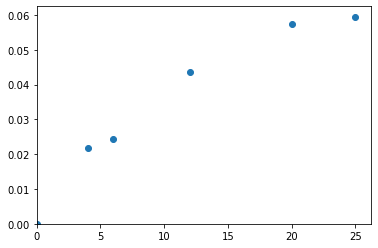

In [11]:
x_axis = df_experiment['[Substrate] (µmol/dm3)'] 
y_axis = df_experiment['Vo (µmol/min)']

plt.plot(x_axis,y_axis,'o')
plt.axis(xmin=0, ymin=0)
plt.show()

## No experimental data is perfect :(
The data points are slightly off but seems to follow a general curve equation.
### How should we solve the problem?
A regular life science student would use Excel to plot a polynomial best fit curve.
We can achieve the same result on python using [`numpy poly.fit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function. (as shown below)

It takes in the following parameters (X values, Y values, Degree of polynomial) 

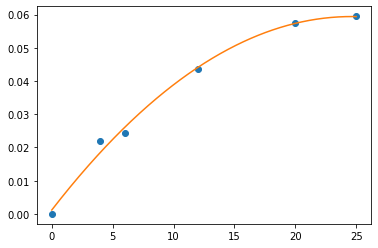

In [12]:
# Extract [substrate] and V0 data 
x_axis = df_experiment['[Substrate] (µmol/dm3)'] 
y_axis = df_experiment['Vo (µmol/min)']

# Use polynomial best fit curve 
new_axis = np.polyfit(x_axis,y_axis,2)
f = np.poly1d(new_axis)

# Calculate new x's and y's
x_new = np.linspace(x_axis[0], x_axis[-1:], 500)
y_new = f(x_new)

plt.plot(x_axis,y_axis,'o', x_new, y_new)

plt.show()

## Looks can be deceiving 
The polynomial best fit looks decent at first glance. 
Let's see what happens when we increase the range of X values.

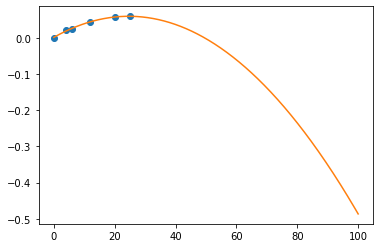

In [13]:
x_axis = df_experiment['[Substrate] (µmol/dm3)'] 
y_axis = df_experiment['Vo (µmol/min)']


new_axis = np.polyfit(x_axis,y_axis,2)
f = np.poly1d(new_axis)


x_new = np.linspace(x_axis[0], 100, 500)
y_new = f(x_new)

plt.plot(x_axis,y_axis,'o', x_new, y_new)

plt.show()

## They had us in the first half (Literally)
As seen from the plot above, the polynomial best fit only passes through the plotted points and never plateaus.\
Hence, this method of estimating the plateau $V{max}$ is actually not ideal.

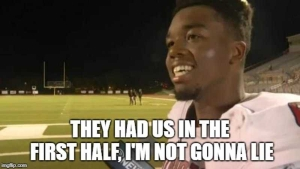

## A bigger tragedy than Twilight, the movie
Normally for science practicals, the $V_{max}$ is estimated using that very sad best fit curve. However, this usually leads to high levels of inaccuracies and alot of bloodshot eyes from squinting at the screen....A true tragedy indeed.

## We ain't average life science students! 
### Time for some scipy **MAGIC**!!

Using the [`optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) function from `scipy`, we can use python to estimate the true value of **$V_{max}$** and **$K_m$** of Lactate Dehydrogenase (LDH) with Lactate via the Michaelis-Menten equation we created at the start of this notebook.


The `scipy.optimize.curve_fit` function takes in the following parameters: `(f, xdata, ydata)`. The first parameter `f` is the function/equation you want to model after. In this case we input `M_M` to model after our Michaelis-Menten equation. The next parameters `xdata` and `ydata` takes in the x and y values of the raw data. We input `x_axis` and `y_axis` respectively for our x and y values of the experiment.
The expected output for this function is `popt` and `pcov`. `popt` is the estimated variable values in the input function. Since our function, `M_M` , contains variables $V_{max}$ and $K_m$, the output would give an estimate for these 2 variables. `pcov`on the other hand gives the estimated covariance of the 2 variables.

(Are you amazed? Because I am!)

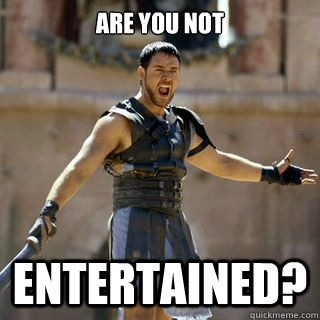


In [14]:
params_fit, cov_fit = optimize.curve_fit(M_M, x_axis, y_axis)

Km_fit, Vmax_fit = params_fit

print(f'Estimated Km value: {Km_fit}')
print(f'Estimated Vmax value: {Vmax_fit}')

Estimated Km value: 16.06370897512578
Estimated Vmax value: 0.10020543975429971


## For those Luddites and Haters....
Of course we have to prove to those doubters! 
Here we check for accuracy of 3 curve parameters

1. Best fit of actual data
2. $V_{max}$ value
3. $K_m$ value




## Check accuracy of Best Fit Curve and $V_{max}$ value together 
1. By plotting the scatterplot of our actual data with our fitted values, we can see the accuracy of our model.
2. Plug the values back into the the original Michaelis-Menten equation and compare it with the $V_{max}$ estimate using `plt.plot`

As demonstrated below, the best fit curve passes through the actual data nicely and plateaus at estimated $V_{max}$ value.

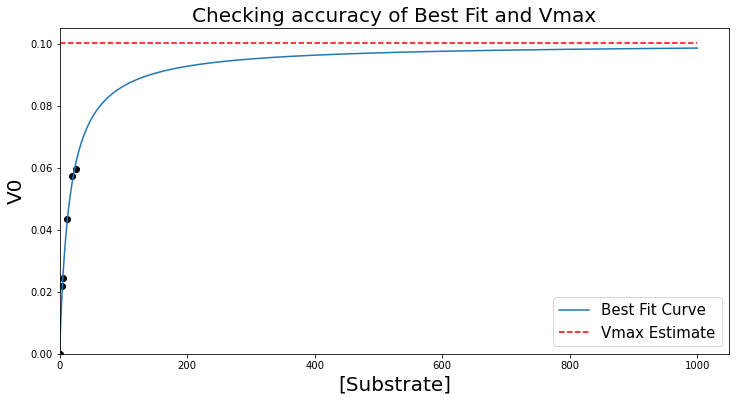

In [15]:
# Set size of plot 
plt.figure(figsize=(12,6))

# Plot Scatter plot of Actual Data 
x_axis = df_experiment['[Substrate] (µmol/dm3)'] 
y_axis = df_experiment['Vo (µmol/min)']
plt.plot(x_axis,y_axis,'o', color = 'k')

# Extremely large range to visualize plateau of curve 
min_S = 0
max_S = 1000
substrate_range = np.linspace(min_S,max_S,num=int(max_S - min_S)*3)

# Plugging estimates back into M_M equation (Note that we are using our fitted values!)
plt.plot(substrate_range, M_M(substrate_range, Km_fit, Vmax_fit),label='Best Fit Curve')

# This plugs estimated Vmax line 
plt.hlines(Vmax_fit,min_S,max_S,"r",label = 'Vmax Estimate',linestyle='dashed')

plt.title('Checking accuracy of Best Fit and Vmax',size=20)
plt.xlabel('[Substrate]',size=20)
plt.ylabel('V0',size=20)
plt.axis(xmin = 0, ymin = 0)
plt.legend(fontsize=15,loc='lower right')
plt.show()

## Check accuracy of $K_m$ value
The $K_m$ value should meet the best fit curve at the point when $v_0$ is at half $V_{max}$ value

The estimated $K_m$ value is accurate since the horizontal line at half $V_{max}$ meets the best fit curve at the same point as $K_m$ estimate vertical line. (as shown below)

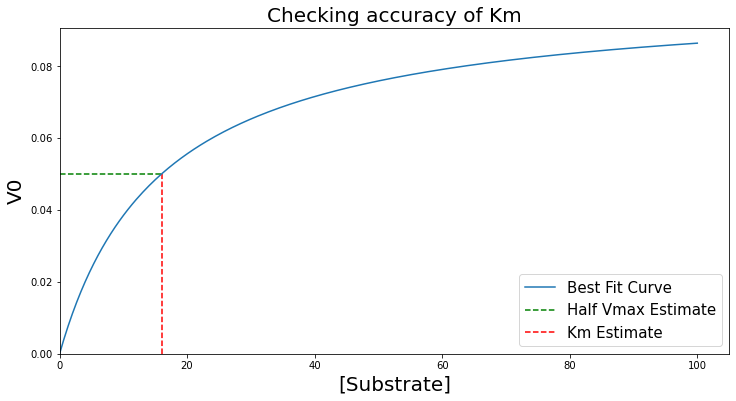

In [16]:
plt.figure(figsize=(12,6))

# Parameter for substrate range
min_S = 0
max_S = 100
substrate_range = np.linspace(min_S,max_S,num=int(max_S - min_S)*3)

# Plugging estimates back into M_M equation + plotting
plt.plot(substrate_range, M_M(substrate_range, Km_fit, Vmax_fit),label='Best Fit Curve')

# This plugs estimated half Vmax line
half_vmax = 0.5*Vmax_fit
plt.hlines(half_vmax,xmin= 0,xmax= Km_fit, color='green',label = 'Half Vmax Estimate', linestyle='dashed')
plt.vlines(Km_fit, ymin = 0, ymax = half_vmax,color='red',label ='Km Estimate', linestyle='dashed')

plt.title('Checking accuracy of Km',size=20)
plt.xlabel('[Substrate]',size=20)
plt.ylabel('V0',size=20)
plt.axis(xmin = 0, ymin = 0)
plt.legend(fontsize=15,loc='lower right')
plt.show()

## Comparing experimental data with Literature data 
We have previously established that our best fit curve accurately predicts the $K_m$ and $V_{max}$ values of LDH enzyme. Now we shall compare our predicted values from the experiment with data from literature publications.

The $K_m$ and $V_{max}$ values of LDH with Lactate was taken from this research paper:

Javed, M. H.; Azimuddin, S. M.; Hussain, A. N.; Ahmed, A.; Ishaq, M. Purification and Characterization of Lactate Dehydrogenase from Varanus Liver. Exp. Mol. Med. 1997, 29 (1), 25–30. https://doi.org/10.1038/emm.1997.4.



## A walk down memory lane....
I hope you still recall our `what_is_this_enzyme_or_substrate` function in Section 3! 


> 


Time to put it to good use! Search for Lactate dehydrogenase enzyme with lactate as its substrate.

In [17]:
what_is_this_enzyme_or_substrate ('lactate dehydrogenase')

,Enzyme,Description,Substrate,Km(mM),Vmax (μmol/min),Citations
18,Lactate dehydrogenase,Lactate dehydrogenase (LDH) is an enzyme requi...,Lactate,12.40,0.270,"Javed, M. H.; Azimuddin, S. M.; Hussain, A. N...."
19,Lactate dehydrogenase,Lactate dehydrogenase (LDH) is an enzyme requi...,Pyruvate,0.17,0.560,"Javed, M. H.; Azimuddin, S. M.; Hussain, A. N...."
20,Lactate dehydrogenase,Lactate dehydrogenase (LDH) is an enzyme requi...,NADH,0.02,0.330,"Javed, M. H.; Azimuddin, S. M.; Hussain, A. N...."
21,Lactate dehydrogenase,Lactate dehydrogenase (LDH) is an enzyme requi...,NAD+,0.38,0.165,"Javed, M. H.; Azimuddin, S. M.; Hussain, A. N...."


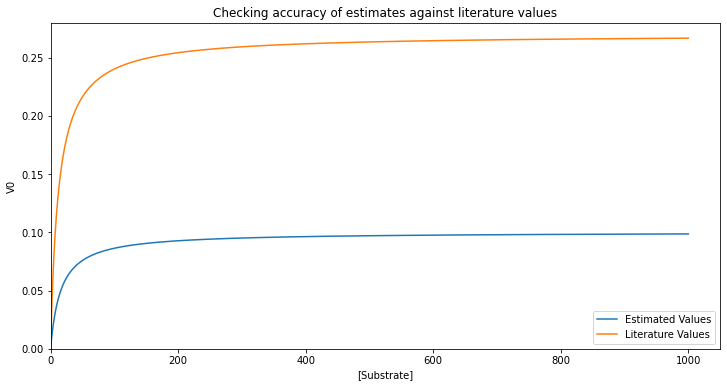

In [18]:
plt.figure(figsize=(12,6))

# Plotting our Estimated Values 
min_S = 0
max_S = 1000
substrate_range = np.linspace(min_S,max_S,num=int(max_S - min_S)*3)
plt.plot(substrate_range, M_M(substrate_range, Km_fit, Vmax_fit),label='Estimated Values')


# Plotting Literature Values (Taken from database shown in the cell above)
Km_lit = 12.4
Vmax_lit = 0.27

# Plugging estimates from literature into M_M equation + plotting
plt.plot(substrate_range, M_M(substrate_range, Km_lit, Vmax_lit),label='Literature Values')

plt.title('Checking accuracy of estimates against literature values')
plt.xlabel('[Substrate]')
plt.ylabel('V0')
plt.axis(xmin = 0, ymin = 0)
plt.legend(loc='lower right')
plt.show()

## Comments on result
As seen from the graph above, both the estimated values curve and the literature values curve follow the general Michaelis-Menten curve. However, our estimated $K_m$ and $V_{max}$ values are underestimated compared to the values from literature. 

# 6.Limitations of our Michaelis-Menten estimate  
As mentioned above, our estimated values differ from the results published in literature. Here are some of the possible causes:

1. pH of solution 
2. Temperature of experiment
3. Concentration of enzyme 
4. Small data set 

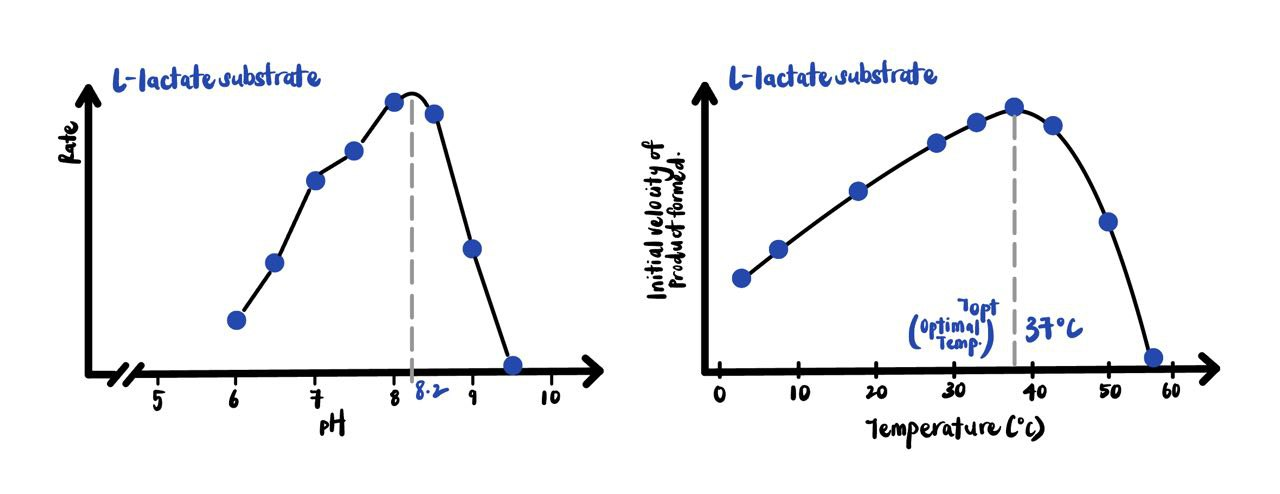

## Discussion of limitations

## 1.pH of solution
Enzymes in general have an optimum pH level which they are most effective in. As seen from the pH vs reaction rate graph above, the optimal pH level for Lactate dehydrogenase with lactate is pH 8.2. At sub-optimal pH levels, the ionizable groups like -NH2 and -COOH can become ionized. Ionic and hydrogen bonds within the enzyme breaks, causing it to lose its specific 3D conformation irreversibly. The enzyme is said to be denatured and can no longer be used for reaction catalysis. Hence, any deviation from this optimum pH level will result in a decrease in reaction rate which will result in an underestimation of the $K_m$ and $V_{max}$ values.

## 2.Temperature of experiment
Enzymes in general also have an optimum temperature which they are most effective in. As seen from the temperature vs reaction rate graph above, the optimal temperature for Lactate dehydrogenase with lactate is at 37℃. At lower temperatures, there is lacking thermal energy in the system. Hence, molecules in the system like enzyme and substrate lack kinetic energy, move slower and collide with each other less frequently. As a result, less enzyme-substrate complexes are formed leading to lower rate of reaction. On the other hand, as temperature increases past its optimal level (37℃), excessive thermal energy increases the kinetic energy of molecules within the enzyme. This increase in kinetic energy disrupts hydrogen bonds and hydrophobic interactions within the enzyme. The specific 3D conformation is lost permanently and becomes denatured. Hence, any deviation from this optimum temperature will result in a decrease in reaction rate which will result in an underestimation of the $K_m$ and $V_{max}$ values.

## 3.Enzyme concentration
The assumption made by comparing different Michaelis-Menten curves is that the enzyme concentration is constant. If enzyme concentrations from both experiments are different it would not be a fair comparision. The experiment which uses a higher enzyme concentration would certainly have a higher $K_m$ and $V_{max}$ values. This is because enzyme concentration is directly proportional to $K_m$ and $V_{max}$. More enzyme equates to faster reactions and a higher capacity for substrate. Hence, higher $K_m$ and $V_{max}$ values respectively.

## 4.Small data set
Our experimental data only had 5 data points and only 1 replicate was done. Firstly, 5 data points is barely enough for a best fit curve estimate. More data points are needed to have a better Michaelis-Menten model. Secondly, more replicates are needed to have accurate and reliable results. 

## Michaelis-Menten might not be the best model
The Michaelis-Menten plot relies alot on estimation and prediction, which are causes of imprecisions. Another model should be considered for enzyme kinetics.






##Lineweaver-Burk Equation
Now, we will look at the Lineweaver-Burk Equation, a linearised version of the Michaelis-Menten Equation. As is the case with any non-linear equation, linearising it is crucial to making calculations easier. This equation is also known to be more accurate since it does not have estimations like the Michaelis-Menten Equation.

We begin with the typical form of the Michaelis-Menten Equation:

$ v_0=\frac{V_{max}[S]}{K_m + [S]} $ 

$ v_0(K_m + [S]) = V_{max}[S] $ 

$ \frac{K_m + S}{V_{max}[S]} = \frac{1}{v_0}$ 

$ \frac{1}{v_0} = \frac{K_m}{V_{max}} \frac{1}{[S]} + \frac{1}{V_{max}} $


Plotting $ \frac{1}{v_0} $ against $ \frac{1}{[S]} $ gives us the Lineweaver-Burk Equation.


Here we make use of a scipy function called [`stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
It takes in 2 parameters `(X,Y)`, which is the X and Y values of our data. It then creates a regression line based on `(X,Y)` data input. The function returns 5 parameters: `slope, intercept, r_value, p_value, std_err` of the regression line. Using that information, we can find out intercept and slope of the Lineweaver-Burk equation.


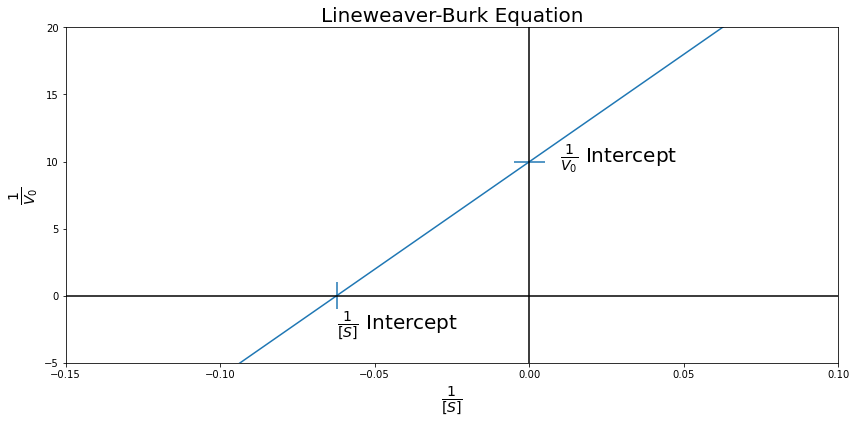

1/[S] Intercept = -0.06225212381203328
Km = 16.063708975125774 

1/V0 Intercept =  9.979498143533581
V0 = 0.1002054397542997 

R Value = 0.9999999999999998


In [19]:
plt.figure(figsize=(12,6))

# Using the same parameter estimates from LDH experimental data
Km = Km_fit
Vmax = Vmax_fit

# Create substrate range, negative number needed due to double reciprocal plot 
min_S = -10
max_S = 10
substrate_range = np.linspace(min_S,max_S,num=int(max_S - min_S)*3)

# Plug in parameters into the lineweaver-burk equation 
Y = 1/(M_M(substrate_range, Km, Vmax))
X = 1 /substrate_range
plt.plot(X, Y)

# Plot axis lines 
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Adjust x and y axis limits for better plot visualisation 
plt.xlim(xmin=-0.15,xmax=0.1)
plt.ylim(ymin=-5,ymax=20)

# Stats library from Scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

# Y intercept (1/V0)
yintercept = intercept 
V0_value = 1/yintercept 

# Plot Y intercept 
plt.hlines(y= yintercept, xmin= -0.005, xmax= 0.005)
plt.text(0.01,yintercept, r'$\frac{1}{V_0}$ Intercept',fontsize=20)

# X intercept (-1/Km)
# Y = mX + C --> X = (Y - C)/m  (find X intercept when Y = 0)
xintercept = ((0 - intercept)/slope)  
Km_value = (-1 / xintercept)

# Plot X intercept 
plt.vlines(x= xintercept, ymin= -1, ymax= 1)
plt.text(xintercept,-2.5, r'$\frac{1}{[S]}$ Intercept',fontsize=20)

plt.title('Lineweaver-Burk Equation', size = 20)
plt.xlabel(r'$\frac{1}{[S]}$', size = 20)
plt.ylabel(r'$\frac{1}{V_0}$', size = 20)
plt.tight_layout()
plt.show()

print("1/[S] Intercept =", (xintercept))
print(f"\033[1mKm = {Km_value}\033[0m \n")

print("1/V0 Intercept = ", yintercept)
print(f"\033[1mV0 = {V0_value}\033[0m \n")

print(f"\033[1mR Value = {r_value}\033[0m")


# 7.Future Works

## How can we improve our estimated values?
- Conduct multiple replicates for the experiment and take the average values for more reliable and accurate results (only 1 replicate was done for this experiment)

- Increase number of tests within the replicate. Instead of testing for 5 substrate concentrations, we can decrease the intervals of the various concentration to collect more data points within the same concentration range. 
(E.g. 1,2,3,4,5 instead of 1,3,5).
A greater number of data points will lead to a higher accuracy best fit curve and hence gain a better prediction model. 

- Maintain constant variables. Variables such as temperature of experiment, pH of solution, concentration of enzyme, must be kept constant. We can refer to the set-up conducted in the literature to get as close to the ideal condition as possible. This will increase our chances of getting similiar results.

## What else is there to do?
We have only predicted the $V_{max}$ and $K_m$ values of Lactate dehydrogenase(LDH) with Lactate using the experimental data. Other substrates such as Pyruvate, NADH and NAD+ can be tested on similiar to Lactate. That only covers LDH enzyme, there are thousands of other enzymes out there that we can experiment on and model using our Michaelis-Menten plot.

## Other things to try out
We aim to explore more into the Lineweaver-Burk plot in future projects to compare its effectiveness as an estimate model with our current Michaelis-Menten curve.The current notebook briefly introduces the Lineweaver-Burk only so we hope to go my in depth into the theory and science behind the double reciprocal graph. 

Another function we hope to create in the future includes a predictive model that takes in the $K_m$ value of an enzyme-substrate and estimates the $V_{max}$ value.


# 8.Summary

Enzymes plays a huge role in the human body, especially in biochemical reactions. In this notebook we introduced the basic concepts of enzyme and substrate pairing via the Lock and Key Hypothesis. Specific 3D conformation and action of enzyme were discussed as well. An enzyme-substrate database named `Enzyme.csv`  was created to showcase the specific enzyme and substrate parings. $V_{max}$ and $K_m$ values were also included for reaction velocity analysis. A function, `what_is_this_enzyme_or_substrate` , was made to allow easy identification of enzyme/substrate without needing to scroll through the entire database.

We were interested in finding out the efficiency of enzymes and went in-depth into reaction velocity analysis of enzymes with the help of the Michaelis-Menten equation. We created a function, `M_M`, that takes in the parameters of the Michaelis-Menten equation, namely, $V_{max}$ and $K_m$ values. Breakdown and analysis of the`M_M` plot were carried out and supported with relevant mathematical equations. 

Application of the concepts was conducted using experimental data of Lactate dehydrogenase with Lacate substrate. Using the [Substrate] and Reaction velocity ($v_0$) from `Experimental_data.csv`. We demonstrated the flaws of a normal polynomial best fit and used `optimize.curve_fit` function from `scipy` to model the Michaelis-Menten equation instead. We were also able to predict the $V_{max}$ and $K_m$ values using that same function. We compared our results with values from literature and realised our values were close but underestimated. Some possible causes were difference in temperature, pH level and enzyme concentrations. 

Future works for our project are to fine tune the Michaelis-Menten best fit model to improve the accuracy and precision of our $V_{max}$ and $K_m$ estimates. We intend to use more experimental data with different enzyme-substrate pairs. We can then widen the range of our estimates and predict the respective values from other pairings. We are also considering to go more in-depth into the Lineweave-Burk plot and compare its effectiveness against our current Michaelis-Menten model. Lastly, we hope to create a predicitve model that takes in the $K_m$ value and predicts the $V_{max}$ value of an enzyme-substrate pair.

## 3 key-takeways from this notebook: 

1. Learn how enzymes and substrate work
2. Theory and importance of the Michaelis-Menten equation
3. How to apply the Michaelis-Menten equation on experimental data


Hope you had as much fun exploring this notebook as we did making it :D